<a href="https://colab.research.google.com/github/RamintaMis/App1/blob/master/datasc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('StudentsPerformance.csv')

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# duoda basic statitsine info
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
# shape - kiek eiluciu/stulpeliu
data.shape 

(1000, 8)

In [9]:
# info apibudina values stulpeliu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Numeric analysis and visualization (stulpeliai kur numeric values)

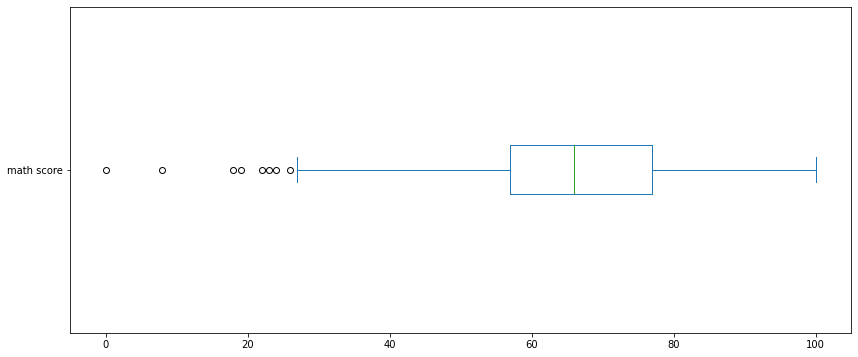

In [14]:
data['math score'].plot(kind='box', vert=False, figsize=(14,6))


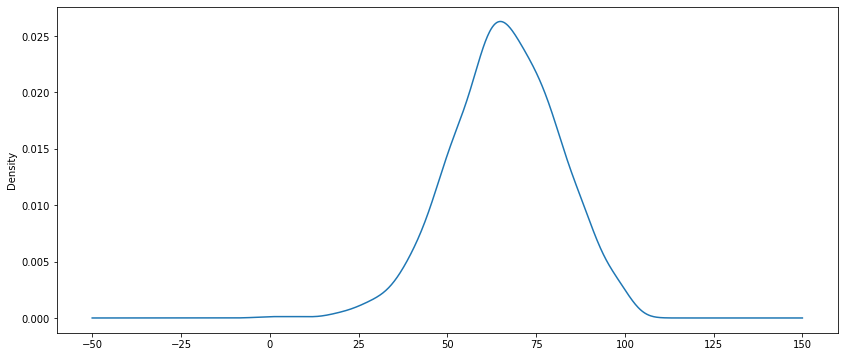

In [17]:
data['math score'].plot(kind='density', figsize=(14,6))

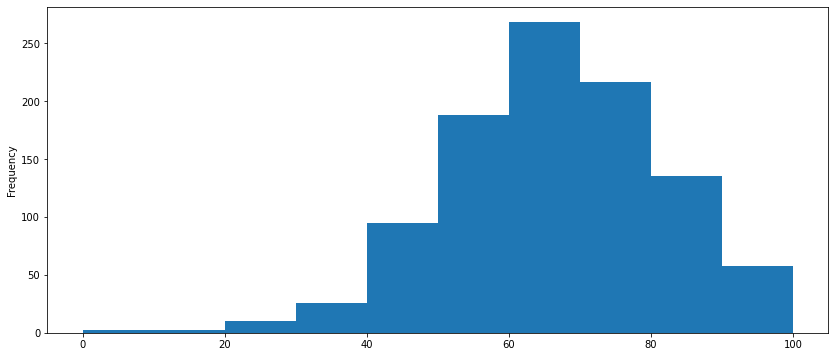

In [19]:
data['math score'].plot(kind='hist', figsize=(14,6))

## Categorical analysis and visualization (stulpeliai kur object/text values)

In [26]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

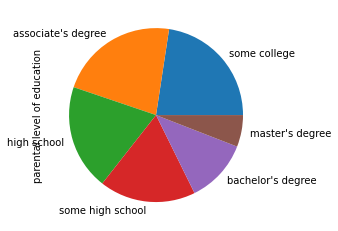

In [27]:
data['parental level of education'].value_counts().plot(kind='pie')

## Correlation

In [28]:
corr = data.corr()
corr

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


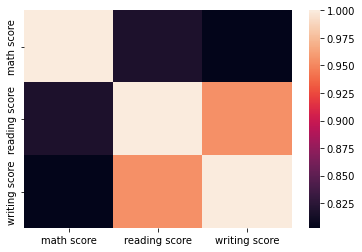

In [49]:
import seaborn as sb
sb.heatmap(corr)

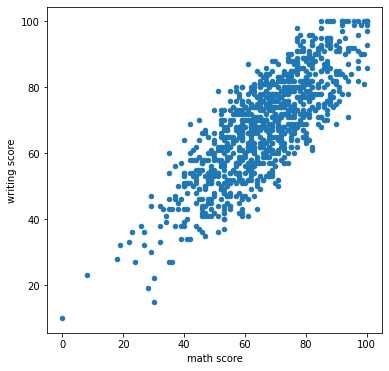

In [50]:
data.plot(kind='scatter', x='math score', y='writing score', figsize=(6,6))

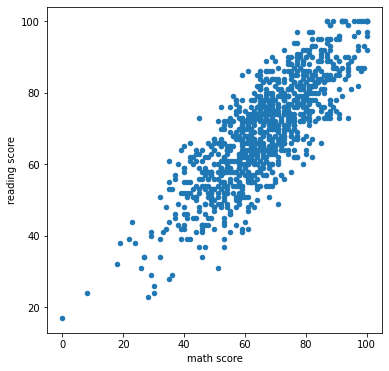

In [51]:
data.plot(kind='scatter', x='math score', y='reading score', figsize=(6,6))

In [30]:
CrosstabResult=pd.crosstab(index=data['parental level of education'],columns=data['lunch'])
CrosstabResult

lunch,free/reduced,standard
parental level of education,,
associate's degree,77,145
bachelor's degree,44,74
high school,70,126
master's degree,24,35
some college,79,147
some high school,61,118


In [33]:
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(CrosstabResult)
ChiSqResult[1]
#jeigu chi 2 testo, p (=ChiSqResult[1]) > 0.05 we accept the null hypthesis = variables are independant of each other

0.9531014927218224

In [34]:
CrossTabResult1 = pd.crosstab(index=data['race/ethnicity'], columns=data['parental level of education'])
ChiSqResult1 = chi2_contingency(CrossTabResult1)
ChiSqResult1[1]
# = 0.07 nuuu i mean

0.07911304840592065

In [45]:
CrossTabResult2 = pd.crosstab(index=data['test preparation course'], columns=data['reading score'])
ChiSqResult2 = chi2_contingency(CrossTabResult2)
ChiSqResult2[1]
#jeigu chi 2 testo, p (=ChiSqResult[1]) < 0.05 we reject the null hypthesis = variables have correlation

0.0030452231920647835

In [48]:
CrossTabResult3 = pd.crosstab(index=data['test preparation course'], columns=data['gender'])
ChiSqResult3 = chi2_contingency(CrossTabResult3)
ChiSqResult3[1]

0.9008273880804724

In [59]:
a = data.loc[data['gender']=='male','math score'].mean()
b = data.loc[data['gender']=='female','math score'].mean()
a,b
#gali filtruot stulpelius kaip nori

(68.72821576763485, 63.633204633204635)

In [60]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [66]:
# ml prediciting math score based on reading and writing
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = data.drop(['gender','race/ethnicity','parental level of education','lunch',
               'test preparation course', 'math score'],axis=1)
y = data['math score']
# x - feature var (turi but dataframe), y= target var(turi but series)


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,shuffle=True,train_size=0.2)

In [72]:
model.fit(X_train,y_train)
model_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test,model_pred)
rmse  = mean_squared_error(y_test,model_pred,squared=False)
r2, rmse

(0.6726819150750776, 8.79751623162836)

In [76]:
# Turning model into a function
coefficients = model.coef_
intercept = model.intercept_
def calculate_math_score(reading_sc, writing_sc):
  return (reading_sc * coefficients[0]) + (writing_sc*coefficients[1]) + intercept

calculate_math_score(100,100)

90.58184715073929